In [ ]:
# import libraries
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import random

%matplotlib inline
sns.set_style("whitegrid")

In [ ]:
# dataframes creation for both training and testing datasets
fashion_train_df = pd.read_csv('fashion_train.csv',sep=',')
fashion_test_df = pd.read_csv('fashion_test.csv', sep = ',')

In [ ]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [ ]:
fashion_train_df.shape


(60000, 785)

In [ ]:
train = np.array(fashion_train_df, dtype='float32')
test = np.array(fashion_test_df, dtype='float32')

In [ ]:
train.shape

(60000, 785)

In [ ]:
train

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Text(0.5, 1.0, 'T_shirt/top')

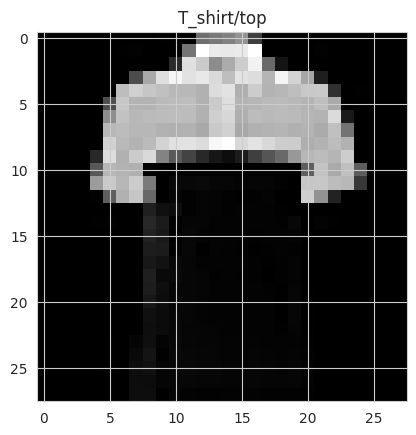

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Let's view some images!
i = random.randint(1,60000) # select any random index from 1 to 60,000
plt.imshow(train[i,1:].reshape((28,28))) # reshape and plot the image

plt.imshow(train[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image
label_index = fashion_train_df["label"][i]
plt.title(f"{class_names[label_index]}")

In [ ]:
label = train[i,0]
label

0.0

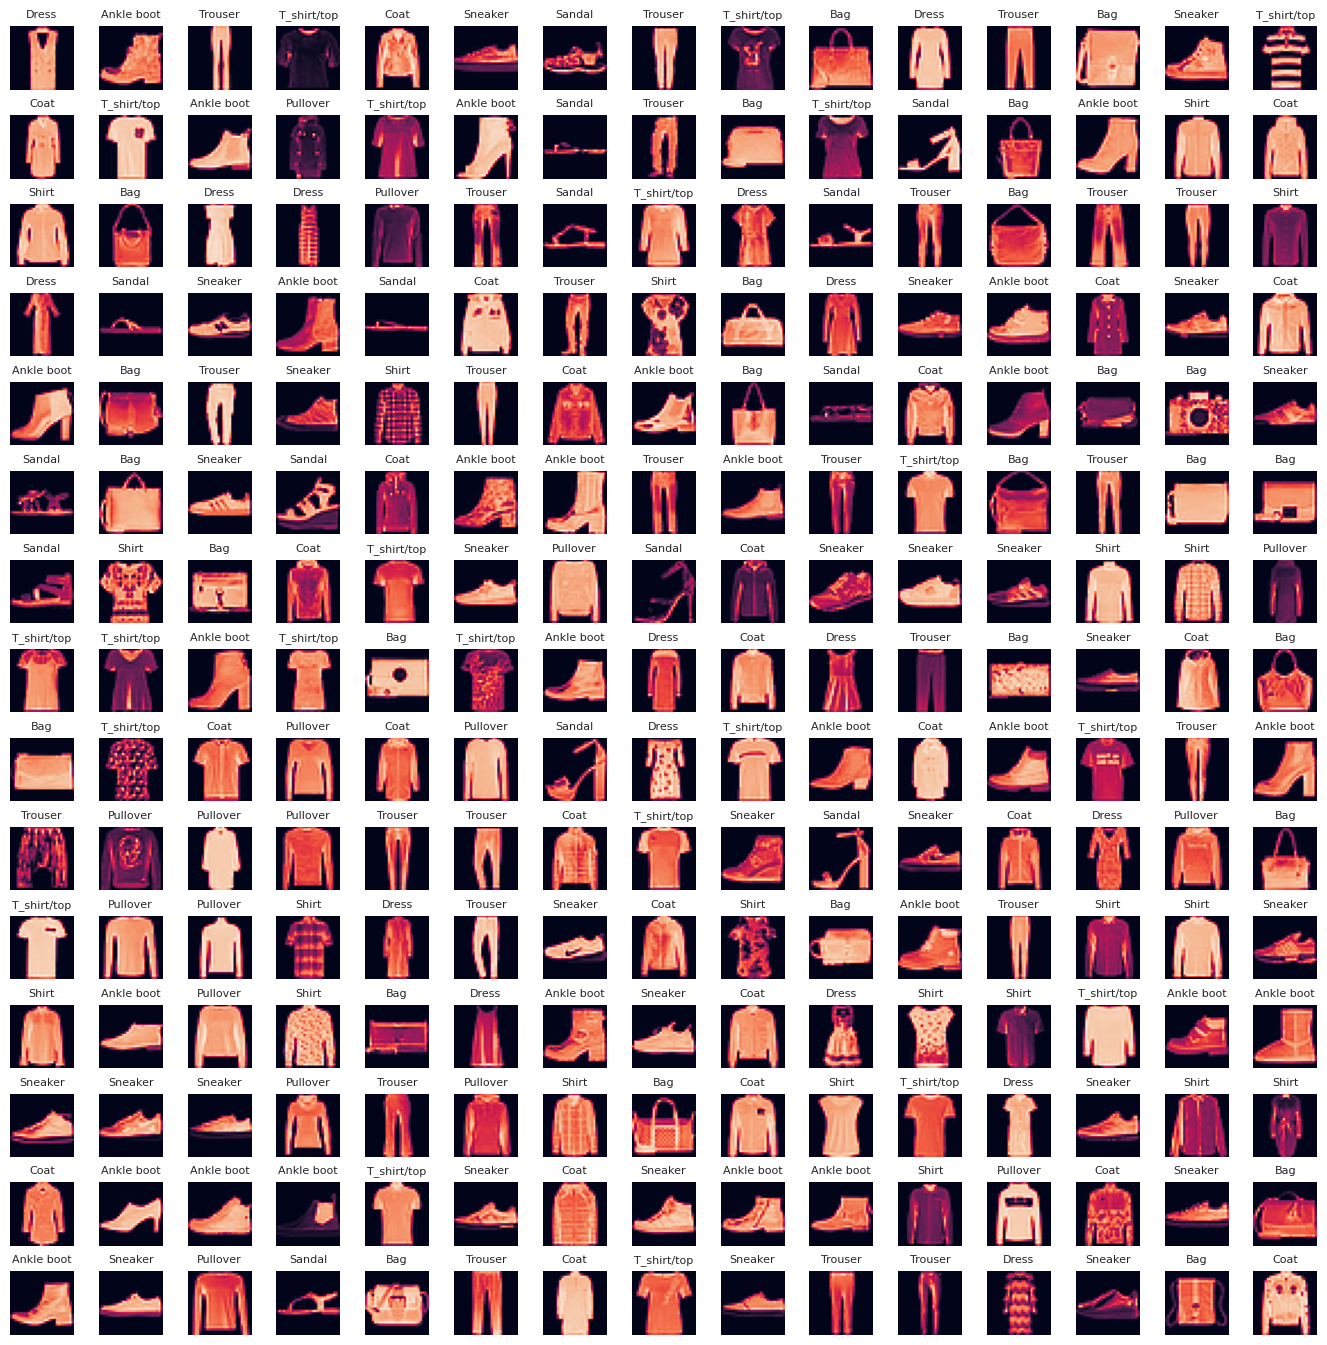

In [ ]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize=(17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    axes[i].imshow( train[index,1:].reshape((28,28)) )
    label_index = int(train[index,0])
    axes[i].set_title(class_names[label_index], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


In [ ]:
# Prepare the training and testing dataset
X_train = train[:, 1:] / 255
y_train = train[:, 0]

X_test = test[:, 1:] / 255
y_test = test[:,0]

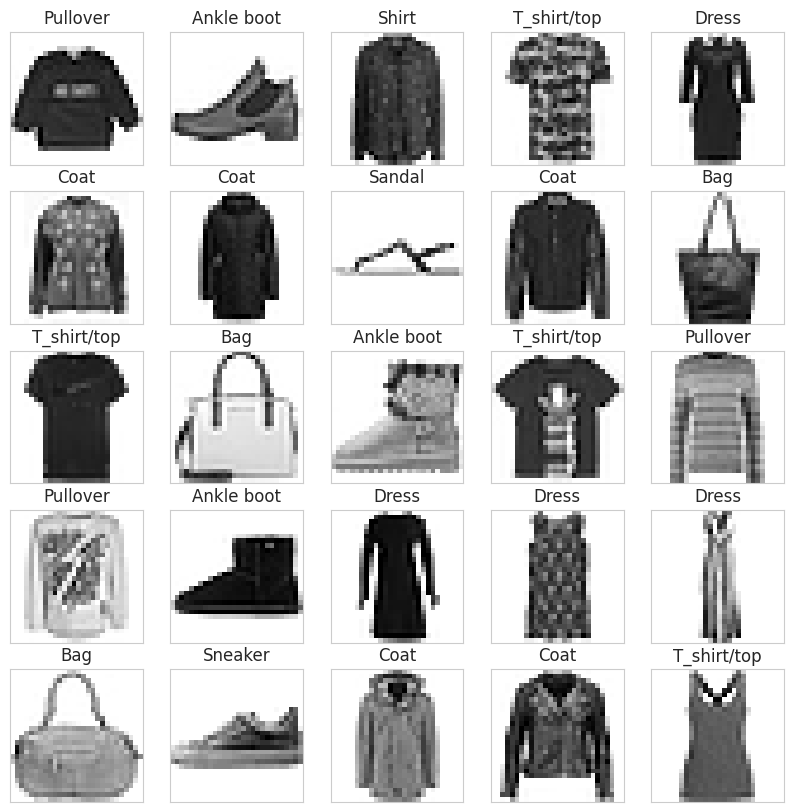

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()
plt.tight_layout()

Text(0.5, 1.0, 'Class distribution in testing set')

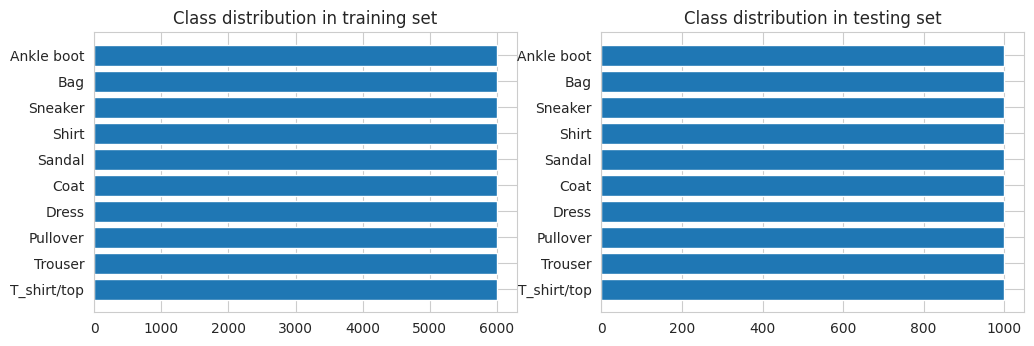

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
classes, counts = np.unique(y_train, return_counts=True)
plt.barh(class_names, counts)
plt.title('Class distribution in training set')

plt.subplot(2, 2, 2)
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(class_names, counts)
plt.title('Class distribution in testing set')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(48000, 784)
(48000,)


In [ ]:
# * unpack the tuple
X_train = X_train.reshape(X_train.shape[0], * (28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], * (28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], * (28, 28, 1))

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)
print(y_validate.shape)

(48000, 28, 28, 1)
(48000,)
(12000, 28, 28, 1)
(12000,)


In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
cnn_model = Sequential()

# Try 32 fliters first then 64
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))

# cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu'))
# cnn_model.add(BatchNormalization())
# cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu'))
# cnn_model.add(BatchNormalization())
# cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
# cnn_model.add(Dropout(0.25))

# cnn_model.add(Conv2D(32,3, 3, activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(units=10, activation='softmax'))

In [ ]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics=['accuracy'])

In [ ]:
epochs = 50
batch_size = 512

history = cnn_model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_validate, y_validate)
)

Epoch 1/50
94/94 [==============================] - 8s 50ms/step - loss: 0.7625 - accuracy: 0.7617 - val_loss: 2.6999 - val_accuracy: 0.2045
Epoch 2/50
94/94 [==============================] - 4s 47ms/step - loss: 0.3769 - accuracy: 0.8630 - val_loss: 2.4728 - val_accuracy: 0.3242
Epoch 3/50
94/94 [==============================] - 4s 47ms/step - loss: 0.3146 - accuracy: 0.8857 - val_loss: 2.0009 - val_accuracy: 0.3883
Epoch 4/50
94/94 [==============================] - 4s 47ms/step - loss: 0.2773 - accuracy: 0.8999 - val_loss: 1.5128 - val_accuracy: 0.6084
Epoch 5/50
94/94 [==============================] - 4s 46ms/step - loss: 0.2533 - accuracy: 0.9075 - val_loss: 0.9378 - val_accuracy: 0.7120
Epoch 6/50
94/94 [==============================] - 5s 48ms/step - loss: 0.2353 - accuracy: 0.9146 - val_loss: 0.5296 - val_accuracy: 0.8227
Epoch 7/50
94/94 [==============================] - 4s 47ms/step - loss: 0.2193 - accuracy: 0.9199 - val_loss: 0.2540 - val_accuracy: 0.9070
Epoch 8/50
94

Text(0.5, 1.0, 'Accuracy evolution')

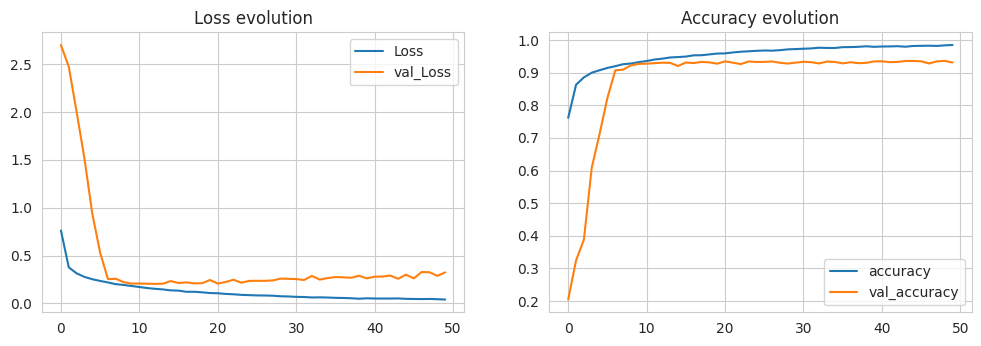

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1]:.3f}')

313/313 [==============================] - 1s 3ms/step - loss: 0.2891 - accuracy: 0.9349
Test Accuracy : 0.935


In [ ]:
# get the predictions for the test data
predicted_classes = cnn_model.predict(X_test)
predicted_classes = np.argmax(predicted_classes, axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
test_img = X_test[0]
prediction = cnn_model.predict(X_test)
prediction[0]

313/313 [==============================] - 1s 2ms/step


array([9.9997103e-01, 3.2410657e-13, 4.1663844e-07, 1.0219609e-06,
       2.9731070e-10, 6.0831474e-12, 2.7480246e-05, 3.8350470e-13,
       3.2363030e-09, 9.0133847e-12], dtype=float32)

In [ ]:
np.argmax(prediction[0])

0

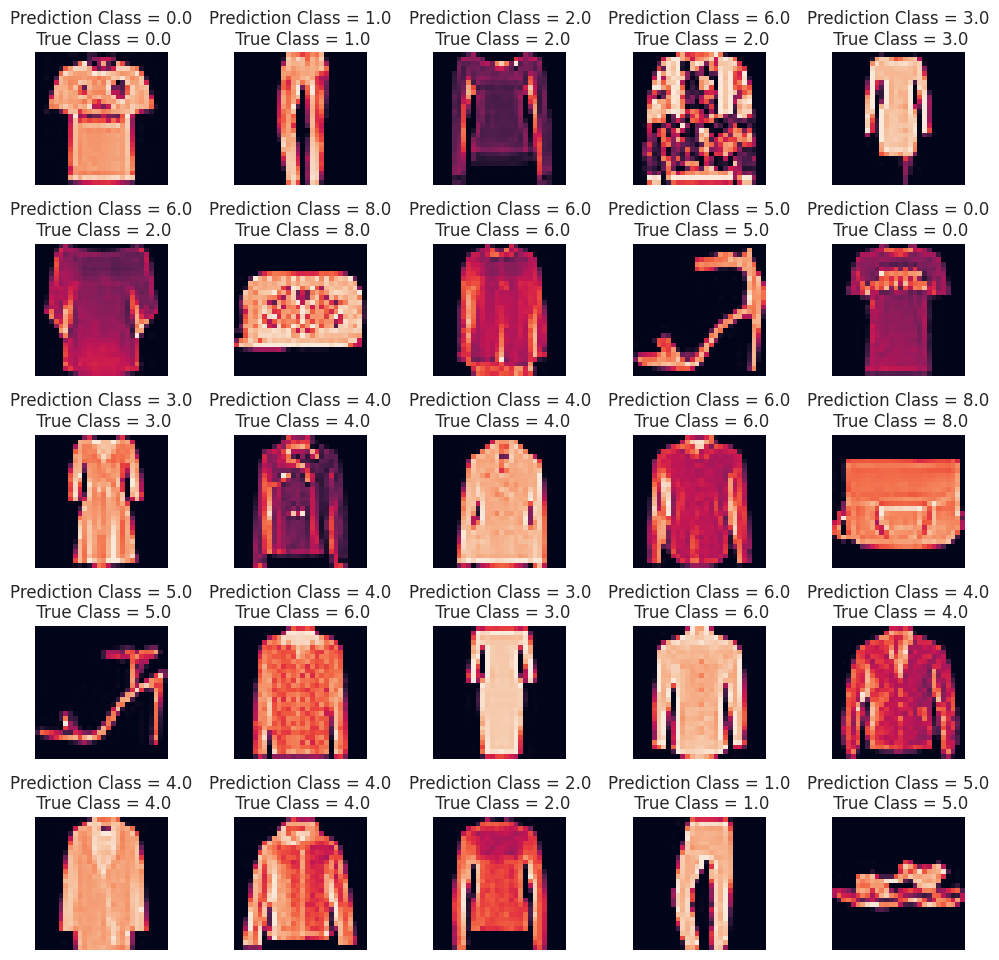

In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {(predicted_classes[i]):0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)


<Axes: >

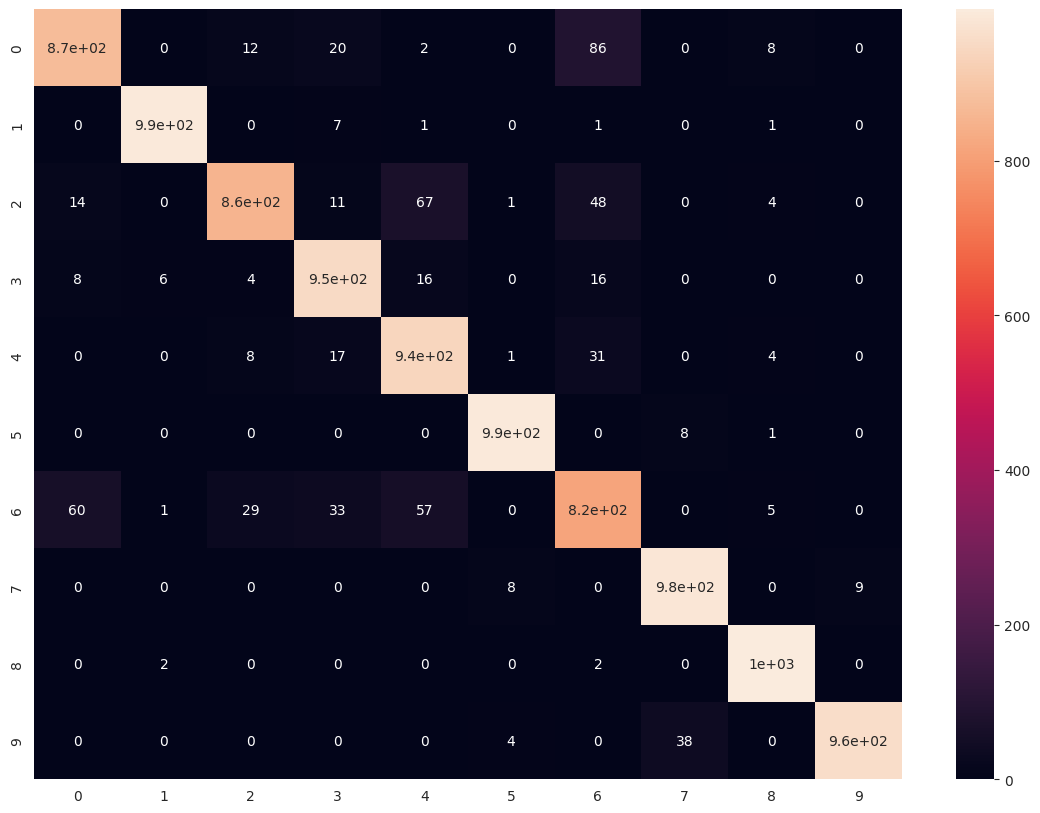

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [ ]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = [f"Class {i}" for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.91      0.87      0.89      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.94      0.85      0.90      1000
     Class 3       0.92      0.95      0.93      1000
     Class 4       0.87      0.94      0.90      1000
     Class 5       0.99      0.99      0.99      1000
     Class 6       0.82      0.81      0.82      1000
     Class 7       0.96      0.98      0.97      1000
     Class 8       0.98      1.00      0.99      1000
     Class 9       0.99      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.94      0.93      0.93     10000
weighted avg       0.94      0.93      0.93     10000



32/32 [==============================] - 0s 2ms/step
Outfit 1:
Predicted Compatibility: 0.59
True Compatibility: 0
Prediction: Compatible


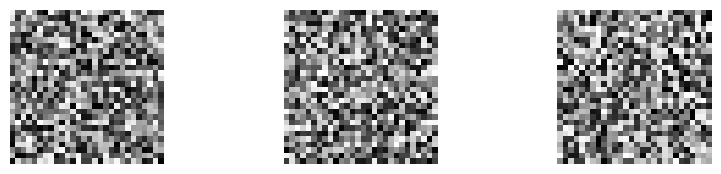



Outfit 2:
Predicted Compatibility: 0.57
True Compatibility: 0
Prediction: Compatible


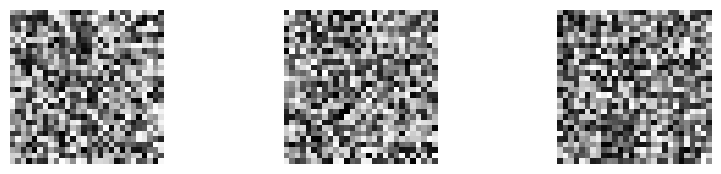



Outfit 3:
Predicted Compatibility: 0.63
True Compatibility: 0
Prediction: Compatible


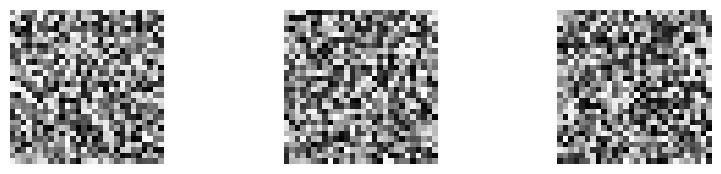



Outfit 4:
Predicted Compatibility: 0.59
True Compatibility: 1
Prediction: Compatible


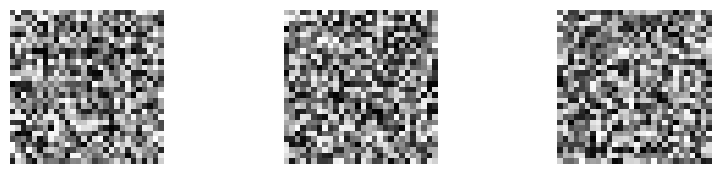



Outfit 5:
Predicted Compatibility: 0.53
True Compatibility: 0
Prediction: Compatible


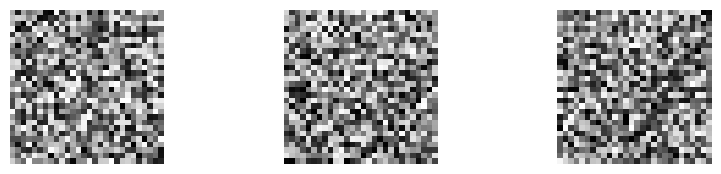



Outfit 6:
Predicted Compatibility: 0.56
True Compatibility: 1
Prediction: Compatible


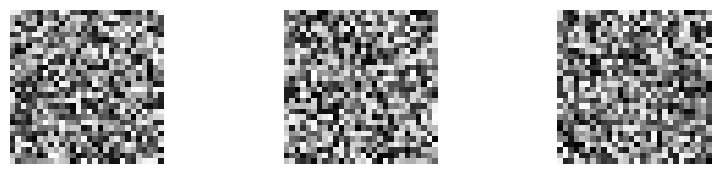



Outfit 7:
Predicted Compatibility: 0.60
True Compatibility: 0
Prediction: Compatible


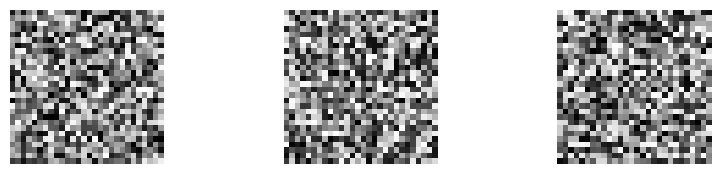



Outfit 8:
Predicted Compatibility: 0.56
True Compatibility: 0
Prediction: Compatible


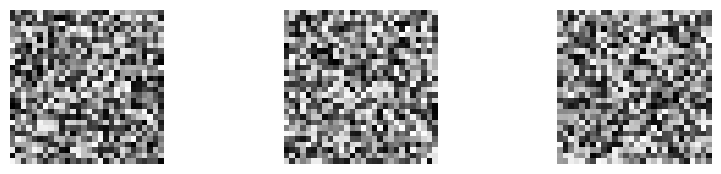



Outfit 9:
Predicted Compatibility: 0.63
True Compatibility: 1
Prediction: Compatible


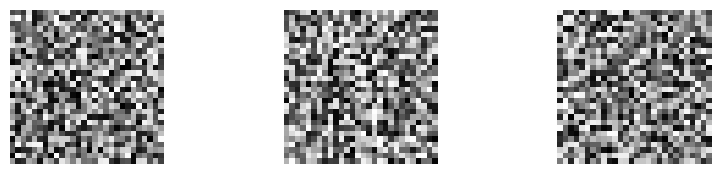



Outfit 10:
Predicted Compatibility: 0.52
True Compatibility: 0
Prediction: Compatible


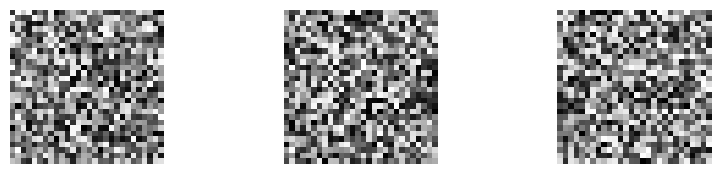



Outfit 11:
Predicted Compatibility: 0.60
True Compatibility: 1
Prediction: Compatible


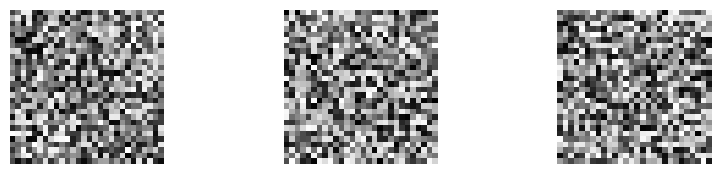



Outfit 12:
Predicted Compatibility: 0.60
True Compatibility: 0
Prediction: Compatible


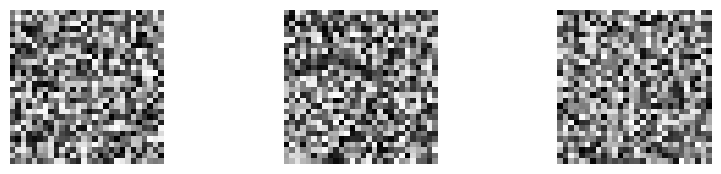



Outfit 13:
Predicted Compatibility: 0.56
True Compatibility: 1
Prediction: Compatible


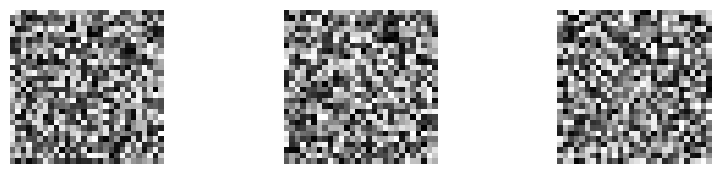



Outfit 14:
Predicted Compatibility: 0.51
True Compatibility: 1
Prediction: Compatible


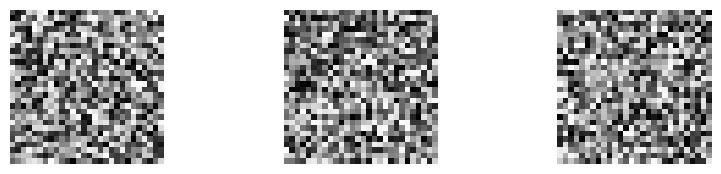



Outfit 15:
Predicted Compatibility: 0.57
True Compatibility: 0
Prediction: Compatible


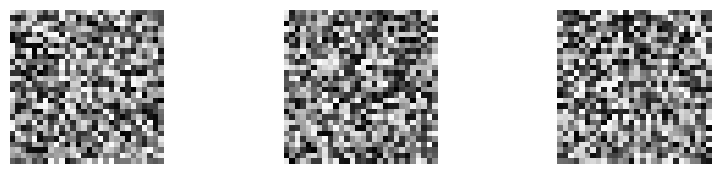



Outfit 16:
Predicted Compatibility: 0.55
True Compatibility: 1
Prediction: Compatible


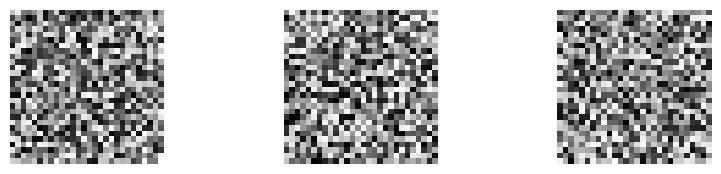



Outfit 17:
Predicted Compatibility: 0.60
True Compatibility: 0
Prediction: Compatible


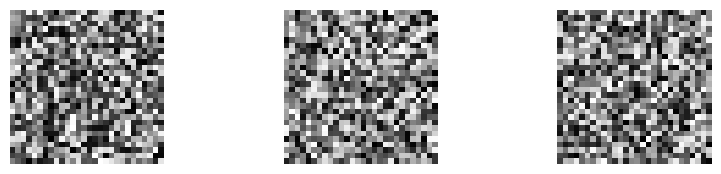



Outfit 18:
Predicted Compatibility: 0.58
True Compatibility: 0
Prediction: Compatible


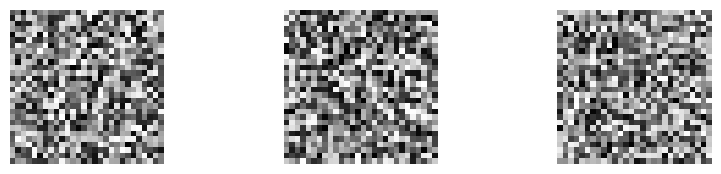



Outfit 19:
Predicted Compatibility: 0.61
True Compatibility: 1
Prediction: Compatible


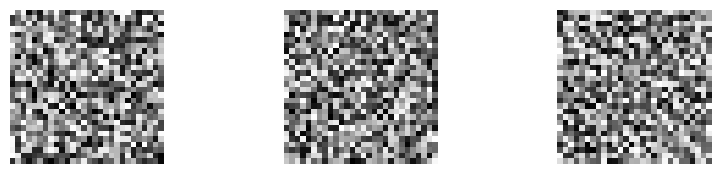



Outfit 20:
Predicted Compatibility: 0.58
True Compatibility: 1
Prediction: Compatible


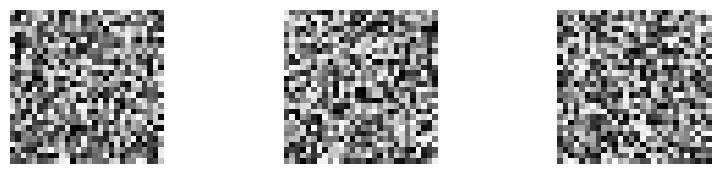



Outfit 21:
Predicted Compatibility: 0.56
True Compatibility: 0
Prediction: Compatible


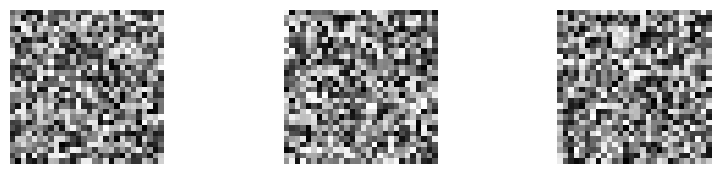



Outfit 22:
Predicted Compatibility: 0.57
True Compatibility: 0
Prediction: Compatible


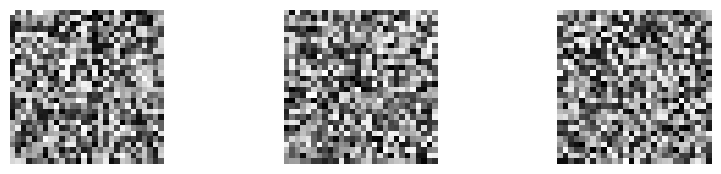



Outfit 23:
Predicted Compatibility: 0.56
True Compatibility: 0
Prediction: Compatible


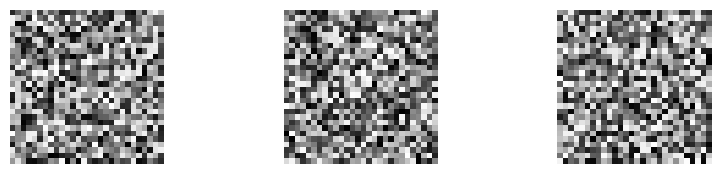



Outfit 24:
Predicted Compatibility: 0.60
True Compatibility: 0
Prediction: Compatible


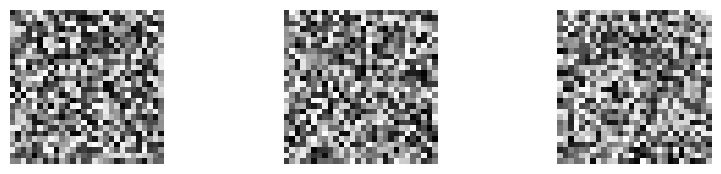



Outfit 25:
Predicted Compatibility: 0.59
True Compatibility: 0
Prediction: Compatible


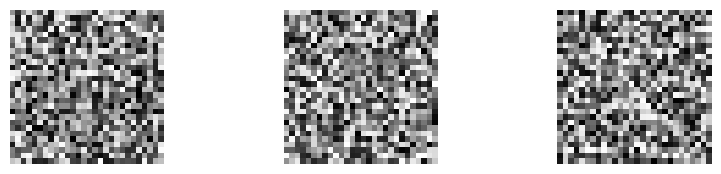



Outfit 26:
Predicted Compatibility: 0.58
True Compatibility: 0
Prediction: Compatible


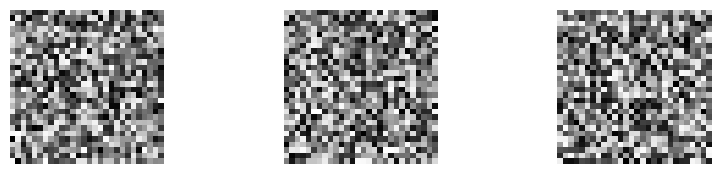



Outfit 27:
Predicted Compatibility: 0.57
True Compatibility: 0
Prediction: Compatible


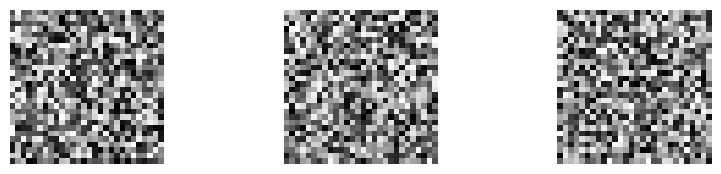



Outfit 28:
Predicted Compatibility: 0.56
True Compatibility: 0
Prediction: Compatible


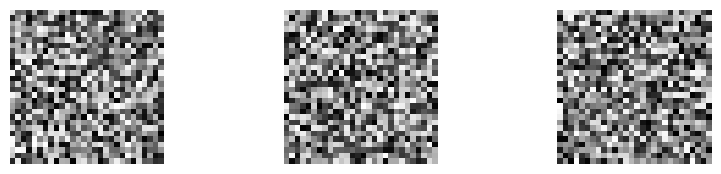



Outfit 29:
Predicted Compatibility: 0.55
True Compatibility: 1
Prediction: Compatible


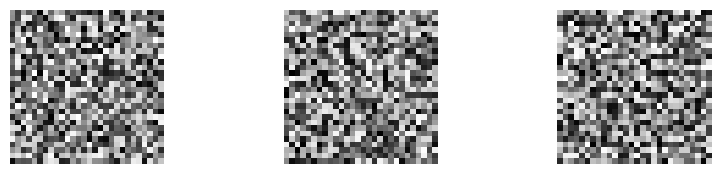



Outfit 30:
Predicted Compatibility: 0.59
True Compatibility: 0
Prediction: Compatible


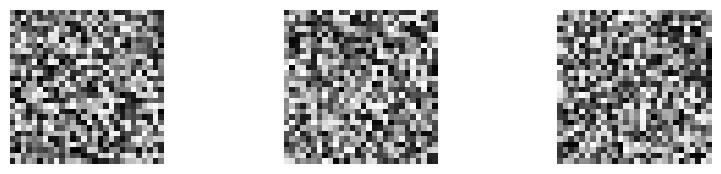



Outfit 31:
Predicted Compatibility: 0.56
True Compatibility: 1
Prediction: Compatible


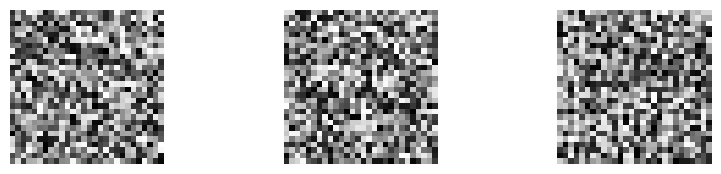



Outfit 32:
Predicted Compatibility: 0.57
True Compatibility: 0
Prediction: Compatible


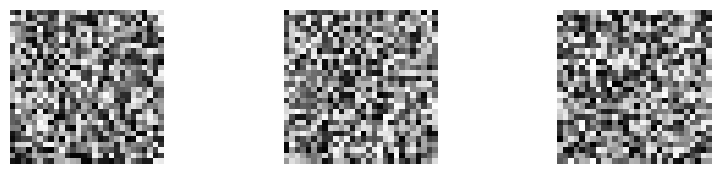



Outfit 33:
Predicted Compatibility: 0.56
True Compatibility: 0
Prediction: Compatible


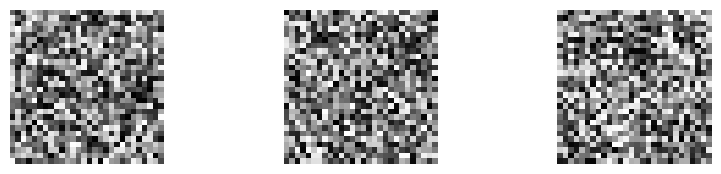



Outfit 34:
Predicted Compatibility: 0.66
True Compatibility: 1
Prediction: Compatible


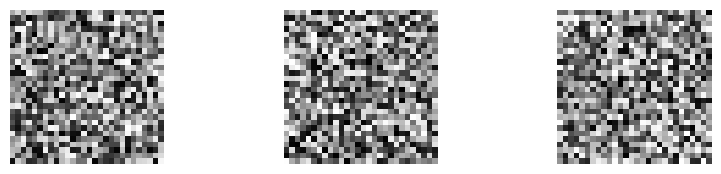



Outfit 35:
Predicted Compatibility: 0.60
True Compatibility: 0
Prediction: Compatible


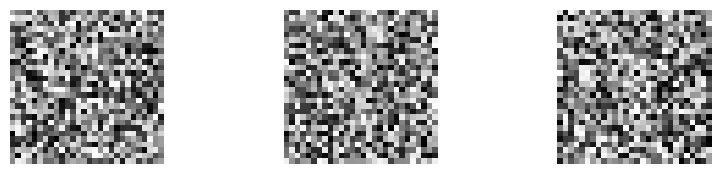



Outfit 36:
Predicted Compatibility: 0.55
True Compatibility: 1
Prediction: Compatible


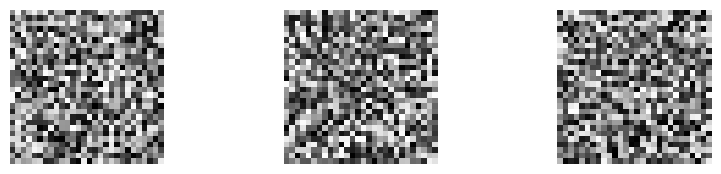



Outfit 37:
Predicted Compatibility: 0.61
True Compatibility: 0
Prediction: Compatible


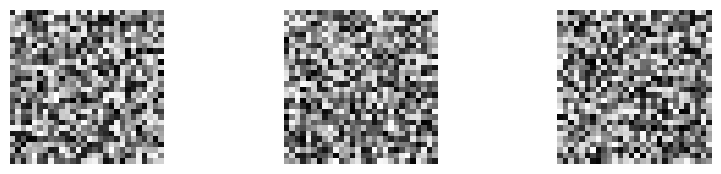



Outfit 38:
Predicted Compatibility: 0.60
True Compatibility: 1
Prediction: Compatible


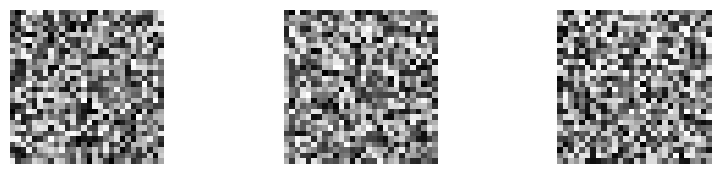



Outfit 39:
Predicted Compatibility: 0.60
True Compatibility: 1
Prediction: Compatible


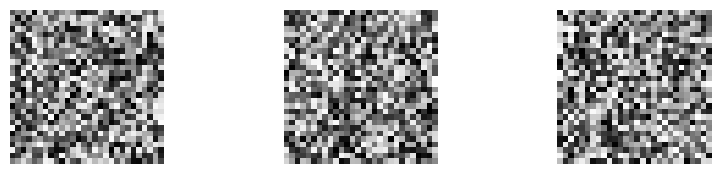



Outfit 40:
Predicted Compatibility: 0.58
True Compatibility: 0
Prediction: Compatible


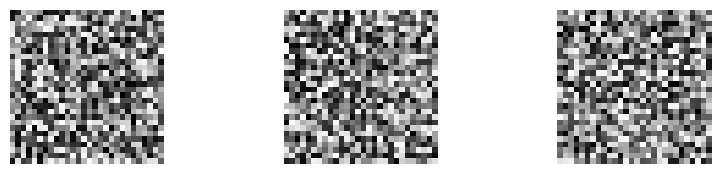



Outfit 41:
Predicted Compatibility: 0.56
True Compatibility: 0
Prediction: Compatible


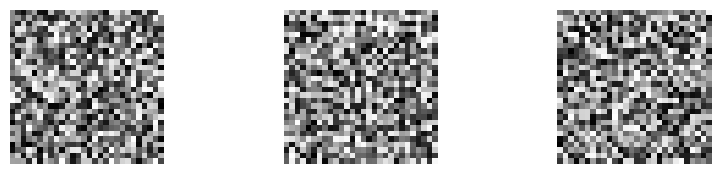



Outfit 42:
Predicted Compatibility: 0.57
True Compatibility: 1
Prediction: Compatible


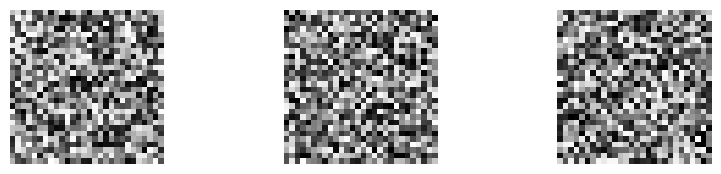



Outfit 43:
Predicted Compatibility: 0.57
True Compatibility: 0
Prediction: Compatible


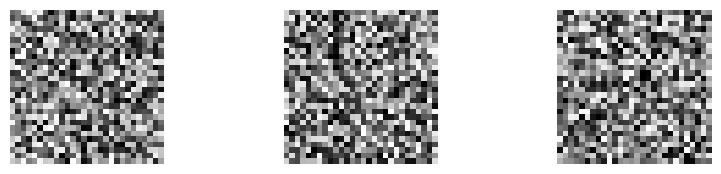



Outfit 44:
Predicted Compatibility: 0.59
True Compatibility: 1
Prediction: Compatible


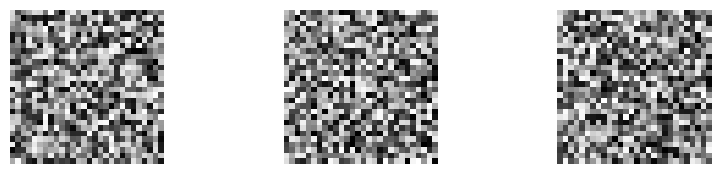



Outfit 45:
Predicted Compatibility: 0.58
True Compatibility: 0
Prediction: Compatible


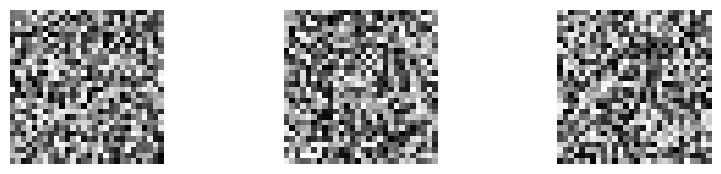



Outfit 46:
Predicted Compatibility: 0.54
True Compatibility: 1
Prediction: Compatible


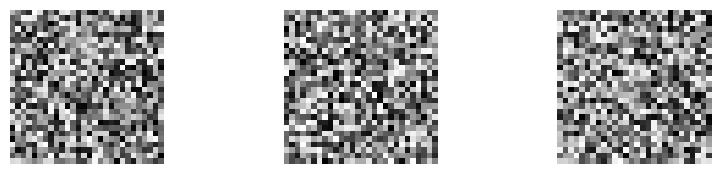



Outfit 47:
Predicted Compatibility: 0.55
True Compatibility: 1
Prediction: Compatible


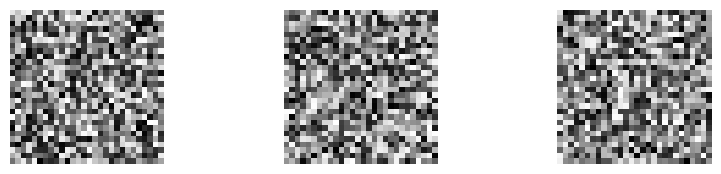



Outfit 48:
Predicted Compatibility: 0.58
True Compatibility: 1
Prediction: Compatible


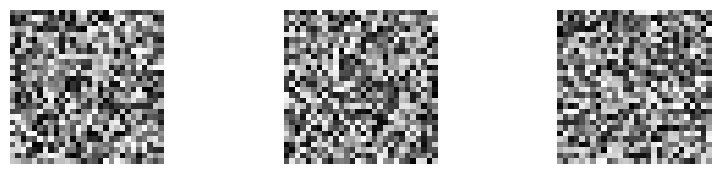



Outfit 49:
Predicted Compatibility: 0.56
True Compatibility: 1
Prediction: Compatible


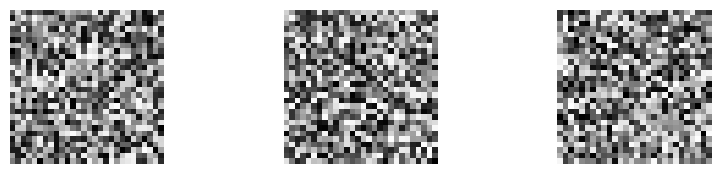



Outfit 50:
Predicted Compatibility: 0.58
True Compatibility: 0
Prediction: Compatible


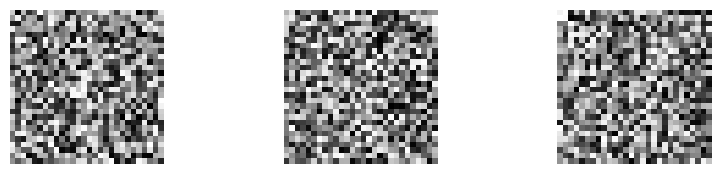



Outfit 51:
Predicted Compatibility: 0.55
True Compatibility: 0
Prediction: Compatible


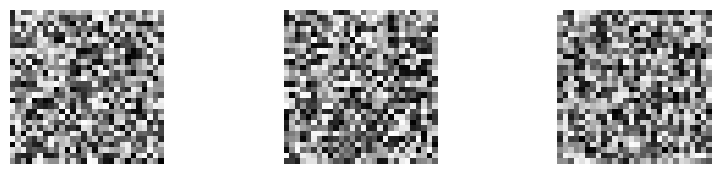



Outfit 52:
Predicted Compatibility: 0.57
True Compatibility: 1
Prediction: Compatible


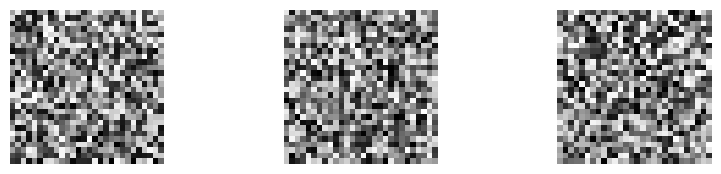



Outfit 53:
Predicted Compatibility: 0.56
True Compatibility: 0
Prediction: Compatible


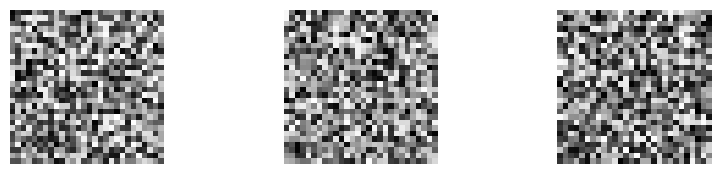



Outfit 54:
Predicted Compatibility: 0.59
True Compatibility: 1
Prediction: Compatible


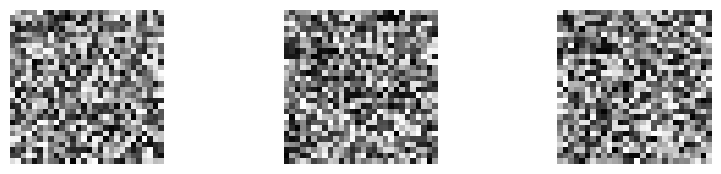



Outfit 55:
Predicted Compatibility: 0.58
True Compatibility: 0
Prediction: Compatible


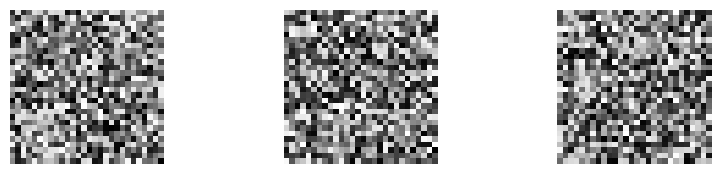



Outfit 56:
Predicted Compatibility: 0.52
True Compatibility: 0
Prediction: Compatible


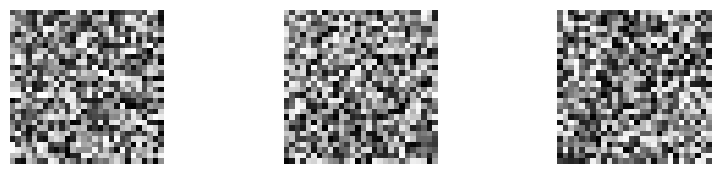



Outfit 57:
Predicted Compatibility: 0.52
True Compatibility: 0
Prediction: Compatible


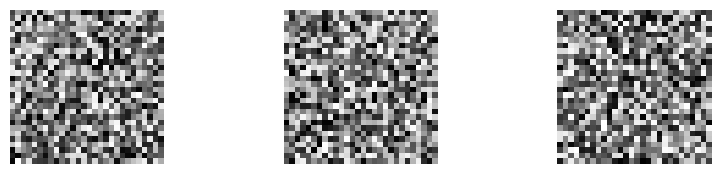



Outfit 58:
Predicted Compatibility: 0.59
True Compatibility: 1
Prediction: Compatible


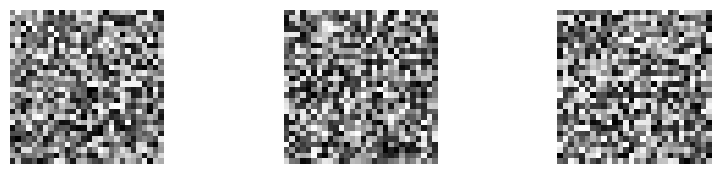



Outfit 59:
Predicted Compatibility: 0.58
True Compatibility: 1
Prediction: Compatible


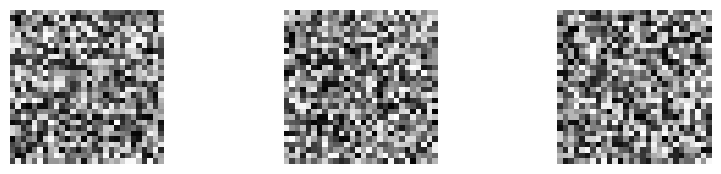



Outfit 60:
Predicted Compatibility: 0.57
True Compatibility: 1
Prediction: Compatible


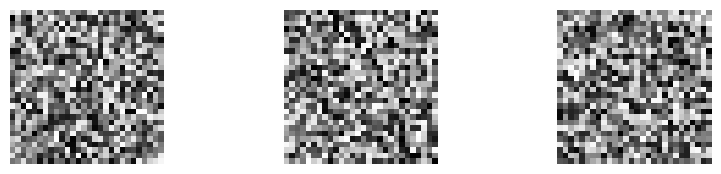



Outfit 61:
Predicted Compatibility: 0.59
True Compatibility: 1


KeyboardInterrupt: ignored

<Figure size 1000x200 with 0 Axes>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Parameters
num_samples = 1000
num_items_per_outfit = 3
input_shape = (28,28,1)


# Generate random outfit data (for demonstration purposes)
fashion_test_df = np.random.rand(num_samples, num_items_per_outfit, *input_shape)
compatibility_labels = np.random.randint(2, size=(num_samples))

# Define and compile the multi-layered comparison network
def create_comparison_network(input_shape):
    input_layer = Input(shape=input_shape)
    flatten_layer = Flatten()(input_layer)
    dense_layer = Dense(128, activation='relu')(flatten_layer)
    output_layer = Dense(1, activation='sigmoid')(dense_layer)
    return Model(inputs=input_layer, outputs=output_layer)

item_models = [create_comparison_network(input_shape) for _ in range(num_items_per_outfit)]

input_layers = [model.input for model in item_models]
output_layers = [model.output for model in item_models]
combined_output = Concatenate()(output_layers)
final_output = Dense(1, activation='sigmoid')(combined_output)

multi_layered_model = Model(inputs=input_layers, outputs=final_output)

optimizer = Adam(learning_rate=0.001)
multi_layered_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Generate a random test dataset (for demonstration purposes)
fashion_test_df = np.random.rand(num_samples, num_items_per_outfit, *input_shape)
test_compatibility_labels = np.random.randint(2, size=(num_samples,))

# Make predictions on the test dataset
test_predictions = multi_layered_model.predict([fashion_test_df[:, i] for i in range(num_items_per_outfit)])

# Initialize variables to keep track of the outfit with the highest predicted compatibility
best_outfit_index = -1
best_compatibility_score = -1

# Display the results
for i in range(len(fashion_test_df)):
    outfit = fashion_test_df[i]
    predicted_compatibility = test_predictions[i][0]  # Access the individual element
    true_compatibility = test_compatibility_labels[i]

    print(f"Outfit {i + 1}:")
    print(f"Predicted Compatibility: {predicted_compatibility:.2f}")
    print(f"True Compatibility: {true_compatibility}")

    # Plot the outfit images
    plt.figure(figsize=(10, 2))
    for j in range(num_items_per_outfit):
        plt.subplot(1, num_items_per_outfit, j + 1)
        plt.imshow(outfit[j], cmap='gray')  # Assuming your images are grayscale
        plt.axis('off')

    if predicted_compatibility >= 0.5:
        print("Prediction: Compatible")
    else:
        print("Prediction: Incompatible")

    plt.show()  # Display the outfit images

    # Check if this outfit has the highest predicted compatibility so far
    if predicted_compatibility > best_compatibility_score:
        best_compatibility_score = predicted_compatibility
        best_outfit_index = i

    print("\n")

# Print the outfit with the highest predicted compatibility
print(f"Best Outfit (Index {best_outfit_index + 1}):")
print(f"Predicted Compatibility: {best_compatibility_score:.2f}")